In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks H-Farm/merged_data_encoded_with_clustered_kmeans_district_final_withriver.csv', index_col = None)

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,rideable_type,Date time,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Duration,closest distrect from start,closest distrect from end,Start district name,Start district latitude,Start district longitudine,End district name,End district latitude,End district longitudine,Start count,End count,closest distrect from start copy,closest distrect from end copy,hour,day,Duration_log,cluster_start,centroids,cluster_end
0,0,0,electric_bike,02/01/2021 00:00:00,2021-02-01 00:30:35,2021-02-01 01:27:41,11th & Kenyon St NW,31102.0,Georgia Ave & Piney Branch Rd NW,31414.0,38.929544,-77.027860,38.967577,-77.028057,member,-0.7,-0.7,-0.7,-6.9,NaN,0.0,0.00,4.02,25.3,21,NaN,6.5,100.0,90.20,Overcast,3426.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Night,Week_day,8.139149,6,0,2
1,1,1,classic_bike,02/01/2021 08:00:00,2021-02-01 08:54:39,2021-02-01 09:05:12,14th & Girard St NW,31123.0,14th St Heights / 14th & Crittenden St NW,31402.0,38.925284,-77.032375,38.947774,-77.032818,member,-1.6,-1.6,-1.6,-8.2,NaN,0.0,0.17,5.35,26.5,333,NaN,7.1,100.0,88.99,Snow,633.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Morning,Week_day,6.450470,6,0,6
2,2,2,classic_bike,02/01/2021 14:00:00,2021-02-01 14:53:52,2021-02-01 15:12:03,14th & Harvard St NW,31105.0,Georgia & New Hampshire Ave NW,31400.0,38.926800,-77.032200,38.936684,-77.024181,casual,0.0,0.0,0.0,-5.7,NaN,0.0,0.06,5.68,23.4,340,NaN,6.6,100.0,88.72,Snow,1091.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.994850,6,0,6
3,3,3,electric_bike,02/01/2021 15:00:00,2021-02-01 15:07:54,2021-02-01 15:12:46,14th & Irving St NW,31124.0,NaN,NaN,38.928717,-77.032217,38.940000,-77.020000,member,0.5,0.5,0.5,-4.9,NaN,0.0,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,292.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,5.676754,6,0,6
4,4,4,electric_bike,02/01/2021 15:00:00,2021-02-01 15:13:33,2021-02-01 15:21:13,Park Rd & Holmead Pl NW,31602.0,NaN,NaN,38.930746,-77.031286,38.950000,-77.020000,casual,0.5,0.5,0.5,-4.9,NaN,0.0,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,460.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.131226,6,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453736,453736,457499,classic_bike,04/25/2021 15:00:00,2021-04-25 15:19:12,2021-04-25 16:06:25,Jefferson Dr & 14th St SW,31247.0,Mt Vernon Trail & S. Washington St.,31929.0,38.888553,-77.032427,38.793065,-77.049436,member,18.3,18.3,18.3,NaN,NaN,0.0,0.00,0.00,22.6,310,44.8,16.0,84.2,50.29,Overcast,2833.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_end,7.949091,1,0,5
453737,453737,457500,classic_bike,04/26/2021 12:00:00,2021-04-26 12:17:46,2021-04-26 12:59:34,Jefferson Memorial,31249.0,Prince St & Union St,31041.0,38.879819,-77.037413,38.803124,-77.040363,casual,15.5,15.5,15.5,NaN,NaN,0.0,0.00,0.00,22.1,311,36.9,16.0,0.0,23.62,Clear,2508.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_day,7.827241,1,0,5
453738,453738,457501,electric_bike,04/27/2021 11:00:00,2021-04-27 11:32:38,2021-04-27 11:57:15,Jefferson Memorial,31249.0,Prince St & Union St,31041.0,38.879786,-77.037337,38.803253,-77.040232,casual,19.0,19.0,19.0,NaN,NaN,0.0,0.

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.drop('Unnamed: 0.1', axis = 1, inplace = True)

In [ ]:
df_backup = df.copy()
df

,rideable_type,Date time,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Duration,closest distrect from start,closest distrect from end,Start district name,Start district latitude,Start district longitudine,End district name,End district latitude,End district longitudine,Start count,End count,closest distrect from start copy,closest distrect from end copy,hour,day,Duration_log,cluster_start,centroids,cluster_end
0,electric_bike,02/01/2021 00:00:00,2021-02-01 00:30:35,2021-02-01 01:27:41,11th & Kenyon St NW,31102.0,Georgia Ave & Piney Branch Rd NW,31414.0,38.929544,-77.027860,38.967577,-77.028057,member,-0.7,-0.7,-0.7,-6.9,NaN,0.0,0.00,4.02,25.3,21,NaN,6.5,100.0,90.20,Overcast,3426.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Night,Week_day,8.139149,6,0,2
1,classic_bike,02/01/2021 08:00:00,2021-02-01 08:54:39,2021-02-01 09:05:12,14th & Girard St NW,31123.0,14th St Heights / 14th & Crittenden St NW,31402.0,38.925284,-77.032375,38.947774,-77.032818,member,-1.6,-1.6,-1.6,-8.2,NaN,0.0,0.17,5.35,26.5,333,NaN,7.1,100.0,88.99,Snow,633.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Morning,Week_day,6.450470,6,0,6
2,classic_bike,02/01/2021 14:00:00,2021-02-01 14:53:52,2021-02-01 15:12:03,14th & Harvard St NW,31105.0,Georgia & New Hampshire Ave NW,31400.0,38.926800,-77.032200,38.936684,-77.024181,casual,0.0,0.0,0.0,-5.7,NaN,0.0,0.06,5.68,23.4,340,NaN,6.6,100.0,88.72,Snow,1091.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.994850,6,0,6
3,electric_bike,02/01/2021 15:00:00,2021-02-01 15:07:54,2021-02-01 15:12:46,14th & Irving St NW,31124.0,NaN,NaN,38.928717,-77.032217,38.940000,-77.020000,member,0.5,0.5,0.5,-4.9,NaN,0.0,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,292.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,5.676754,6,0,6
4,electric_bike,02/01/2021 15:00:00,2021-02-01 15:13:33,2021-02-01 15:21:13,Park Rd & Holmead Pl NW,31602.0,NaN,NaN,38.930746,-77.031286,38.950000,-77.020000,casual,0.5,0.5,0.5,-4.9,NaN,0.0,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,460.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.131226,6,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453736,classic_bike,04/25/2021 15:00:00,2021-04-25 15:19:12,2021-04-25 16:06:25,Jefferson Dr & 14th St SW,31247.0,Mt Vernon Trail & S. Washington St.,31929.0,38.888553,-77.032427,38.793065,-77.049436,member,18.3,18.3,18.3,NaN,NaN,0.0,0.00,0.00,22.6,310,44.8,16.0,84.2,50.29,Overcast,2833.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_end,7.949091,1,0,5
453737,classic_bike,04/26/2021 12:00:00,2021-04-26 12:17:46,2021-04-26 12:59:34,Jefferson Memorial,31249.0,Prince St & Union St,31041.0,38.879819,-77.037413,38.803124,-77.040363,casual,15.5,15.5,15.5,NaN,NaN,0.0,0.00,0.00,22.1,311,36.9,16.0,0.0,23.62,Clear,2508.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_day,7.827241,1,0,5
453738,electric_bike,04/27/2021 11:00:00,2021-04-27 11:32:38,2021-04-27 11:57:15,Jefferson Memorial,31249.0,Prince St & Union St,31041.0,38.879786,-77.037337,38.803253,-77.040232,casual,19.0,19.0,19.0,NaN,NaN,0.0,0.00,0.00,10.8,170,NaN,16.0,79.3,50.09,Overcast,1477.0,15,6,National Mall,38.887398,-77.036415,C

In [ ]:
df['started_at'] = pd.to_datetime(df['started_at'])

df['hour_1'] = df['started_at'].dt.strftime('%H')

In [ ]:
df

In [ ]:
#new_hour = {"hour": {'00':'Night','01':'Night','02': 'Night','03': 'Night','04': 'Night','05': 'Night','06': 'Morning','07': 'Morning','08': 'Morning','09': 'Morning','10': 'Morning','11': 'Morning','12': 'Afternoon','13': 'Afternoon','14': 'Afternoon','15': 'Afternoon','16': 'Afternoon','17': 'Afternoon','18': 'Evening','19': 'Evening','20': 'Evening','21': 'Evening','22': 'Evening','23': 'Evening'}}
#df = df.replace(new_hour)
#df.hour.value_counts()

In [ ]:
df['Conditions2'] = df['Conditions']
new_conditions = {'Conditions2': {'Rain': 'Rain_snow', 'Snow': 'Rain_snow'}}
df = df.replace(new_conditions)

In [ ]:
df['day_1'] = df['started_at'].dt.strftime('%D')

In [ ]:
a =len(df.loc[df['Conditions'] == 'Clear', :].groupby(['day_1','hour_1'])['Conditions'].count())

In [ ]:
b =len(df.loc[df['Conditions'] == 'Partially cloudy'].groupby(['day_1','hour_1'])['Conditions'].count())

In [ ]:
c =len(df.loc[df['Conditions'] == 'Overcast', :].groupby(['day_1','hour_1'])['Conditions'].count())

In [ ]:
d =len(df.loc[df['Conditions'] == 'Rain', :].groupby(['day_1','hour_1'])['Conditions'].count())

In [ ]:
e =len(df.loc[df['Conditions'] == 'Snow', :].groupby(['day_1','hour_1'])['Conditions'].count())

In [ ]:
f = len(df.groupby(['day_1','hour_1'])['Conditions'].count())

In [ ]:
df.member_casual.value_counts()

member    263146
casual    190595
Name: member_casual, dtype: int64

In [ ]:
df.loc[df['member_casual']=='member']

,rideable_type,Date time,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Duration,closest distrect from start,closest distrect from end,Start district name,Start district latitude,Start district longitudine,End district name,End district latitude,End district longitudine,Start count,End count,closest distrect from start copy,closest distrect from end copy,hour,day,Duration_log,cluster_start,centroids,cluster_end,hour_1,Conditions2,day_1
0,electric_bike,02/01/2021 00:00:00,2021-02-01 00:30:35,2021-02-01 01:27:41,11th & Kenyon St NW,31102.0,Georgia Ave & Piney Branch Rd NW,31414.0,38.929544,-77.027860,38.967577,-77.028057,member,-0.7,-0.7,-0.7,-6.9,NaN,0.00,0.00,4.02,25.3,21,NaN,6.5,100.0,90.20,Overcast,3426.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Night,Week_day,8.139149,6,0,2,00,Overcast,02/01/21
1,classic_bike,02/01/2021 08:00:00,2021-02-01 08:54:39,2021-02-01 09:05:12,14th & Girard St NW,31123.0,14th St Heights / 14th & Crittenden St NW,31402.0,38.925284,-77.032375,38.947774,-77.032818,member,-1.6,-1.6,-1.6,-8.2,NaN,0.00,0.17,5.35,26.5,333,NaN,7.1,100.0,88.99,Snow,633.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Morning,Week_day,6.450470,6,0,6,08,Rain_snow,02/01/21
3,electric_bike,02/01/2021 15:00:00,2021-02-01 15:07:54,2021-02-01 15:12:46,14th & Irving St NW,31124.0,NaN,NaN,38.928717,-77.032217,38.940000,-77.020000,member,0.5,0.5,0.5,-4.9,NaN,0.00,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,292.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,5.676754,6,0,6,15,Rain_snow,02/01/21
5,electric_bike,02/01/2021 17:00:00,2021-02-01 17:30:13,2021-02-01 17:39:33,NaN,NaN,14th St & Spring Rd NW,31401.0,38.930000,-77.040000,38.937455,-77.032855,member,-0.1,-0.1,-0.1,-5.3,NaN,0.18,0.06,5.85,20.2,343,NaN,4.6,100.0,88.99,Snow,560.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.327937,6,0,6,17,Rain_snow,02/01/21
6,classic_bike,02/01/2021 17:00:00,2021-02-01 17:47:03,2021-02-01 18:00:16,14th & Newton St NW,31649.0,Georgia & New Hampshire Ave NW,31400.0,38.931991,-77.032956,38.936684,-77.024181,member,-0.1,-0.1,-0.1,-5.3,NaN,0.18,0.06,5.85,20.2,343,NaN,4.6,100.0,88.99,Snow,793.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.675823,6,0,6,17,Rain_snow,02/01/21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453733,classic_bike,04/23/2021 13:00:00,2021-04-23 13:57:28,2021-04-23 14:22:36,Jefferson Memorial,31249.0,Potomac Ave & Swann Ave,31916.0,38.879819,-77.037413,38.829545,-77.047844,member,15.6,15.6,15.6,NaN,NaN,0.00,0.00,0.00,15.5,242,33.5,16.0,23.2,29.38,Clear,1508.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_day,7.318540,1,0,5,13,Clear,04/23/21
453734,classic_bike,04/24/2021 14:00:00,2021-04-24 14:09:40,2021-04-24 14:40:42,Jefferson Memorial,31249.0,Madison St & Fairfax St,31918.0,38.879819,-77.037413,38.812351,-77.040691,member,18.3,18.3,18.3,NaN,NaN,0.00,0.00,0.00,16.5,173,NaN,16.0,93.4,32.72,Overcast,1862.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_end,7.529406,1,0,5,14,Overcast,04/24/21
453735,classic_bike,04/24/2021 17:00:00,2021-04-24 17:39:21,2021-04-24 18:15:00,Jefferson Memorial,31249.0,Powhatan St & Bashford 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font',family='Times New Roman')

#sns.set_palette("Blues")

from matplotlib import rcParams
import matplotlib.font_manager
rcParams['axes.spines.top']= False
rcParams['axes.spines.right']= False
plt.rcParams["font.family"] = "Times New Roman"
#plt.rcParams['font.serif'] = ['Times New Roman']

rcParams['xtick.labelsize'] = 'xx-large'
rcParams['ytick.labelsize'] = 'xx-large'

rcParams['figure.figsize'] = 15, 6

In [ ]:
a/f,b/f,c/f,d/f,e/f

(0.2511737089201878,
 0.1544600938967136,
 0.4610328638497653,
 0.10610328638497653,
 0.027230046948356807)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


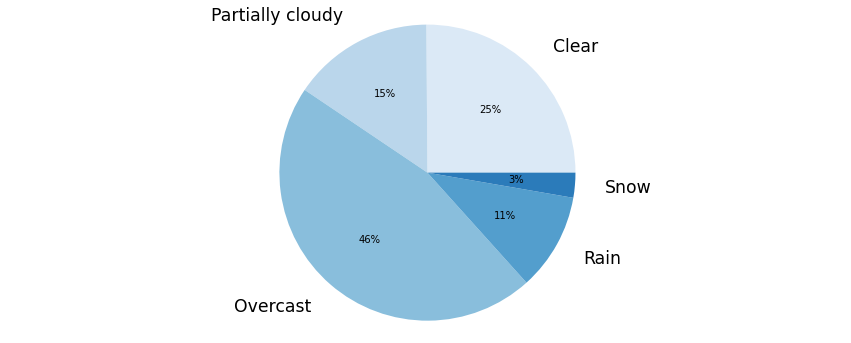

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig1, ax1 = plt.subplots()
sizes = np.array([a/f, b/f, c/f, d/f, e/f])*100

ax1.pie(sizes, labels= np.array(['Clear', 'Partially cloudy', 'Overcast', 'Rain', 'Snow']), 
        autopct='%1.0f%%', pctdistance=0.6, labeldistance=1.2)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Number of rides with rain are significantly lower.

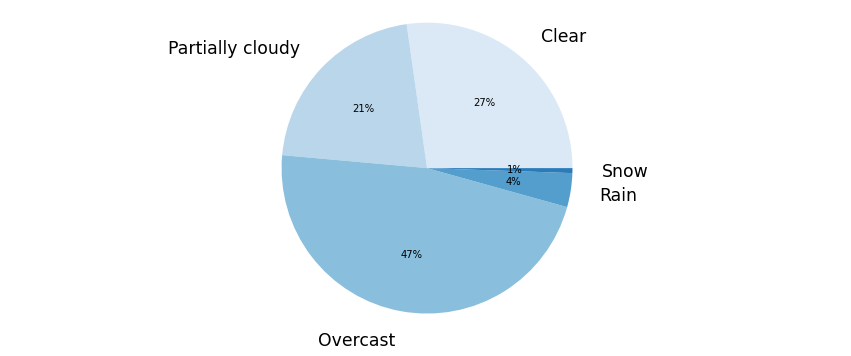

In [ ]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
sizes = (np.array([df['Conditions'].value_counts(normalize=True)[1],
         df['Conditions'].value_counts(normalize=True)[2],
         df['Conditions'].value_counts(normalize=True)[0],
         df['Conditions'].value_counts(normalize=True)[3],
         df['Conditions'].value_counts(normalize=True)[4]]))*100

ax1.pie(sizes, labels= np.array(['Clear', 'Partially cloudy','Overcast','Rain', 'Snow']),startangle=0, autopct='%1.0f%%', pctdistance=0.6, labeldistance=1.2)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
df['Conditions'].value_counts(normalize=True)

Overcast            0.470978
Clear               0.272479
Partially cloudy    0.213322
Rain                0.037733
Snow                0.005488
Name: Conditions, dtype: float64

Regression Weather

In [ ]:
df1 = pd.DataFrame(df.groupby(['day_1','hour_1'])[['Conditions']].count())
df2 = pd.DataFrame(df.groupby(['day_1','hour_1'])[['Conditions2','Temperature', 'Wind Speed', 'Visibility']].min())
df_weather = pd.concat((df1,df2), axis= 1)
df_weather.reset_index(inplace= True)

df_weather['day_1'] = pd.to_datetime(df_weather['day_1'])

df_weather['month'] = df_weather['day_1'].dt.strftime('%m')
df_weather['day'] = df_weather['day_1'].dt.strftime('%d')
df_weather.rename({'hour_1': 'hour'}, axis= 1,inplace = True)
df_weather.rename({'Conditions': 'num_rides'}, axis= 1,inplace = True)
new_conditions = {'Conditions2': {'Rain_snow':1,'Overcast':0,'Partially cloudy': 0,'Clear': 0}}
df_weather = df_weather.replace(new_conditions)
df_weather.rename({'Conditions2': 'Rain_snow'}, axis= 1,inplace = True)
df_weather = df_weather[['num_rides', 'Rain_snow', 'Temperature', 'Wind Speed', 'Visibility', 'month', 'day', 'hour']]
df_weather

,num_rides,Rain_snow,Temperature,Wind Speed,Visibility,month,day,hour
0,12,0,-0.7,25.3,6.5,02,01,00
1,3,1,-0.7,23.0,10.5,02,01,01
2,3,1,-0.7,26.3,13.2,02,01,02
3,5,1,-0.7,21.6,11.5,02,01,03
4,8,1,-0.7,21.7,8.6,02,01,04
...,...,...,...,...,...,...,...,...
2125,325,1,13.7,37.0,16.0,04,30,19
2126,224,0,13.2,27.9,16.0,04,30,20
2127,156,0,12.1,33.8,16.0,04,30,21
2128,153,0,12.1,24.5,16.0,04,30,22


In [ ]:
df_weather.num_rides.describe()

count    2130.000000
mean      213.023944
std       233.993303
min         1.000000
25%        34.000000
50%       141.000000
75%       300.000000
max      1430.000000
Name: num_rides, dtype: float64

In [ ]:
df_weather = pd.get_dummies(df_weather, columns= ['month', 'day', 'hour'])

In [ ]:
df_weather.columns

Index(['num_rides', 'Rain_snow', 'Temperature', 'Wind Speed', 'Visibility',
       'month_02', 'month_03', 'month_04', 'day_01', 'day_02', 'day_03',
       'day_04', 'day_05', 'day_06', 'day_07', 'day_08', 'day_09', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
       'hour_00', 'hour_01', 'hour_02', 'hour_03', 'hour_04', 'hour_05',
       'hour_06', 'hour_07', 'hour_08', 'hour_09', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
training_columns = ['Rain_snow', 'Temperature', 'Wind Speed', 'Visibility',
       'month_03', 'month_04', 'day_02', 'day_03',
       'day_04', 'day_05', 'day_06', 'day_07', 'day_08', 'day_09', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
       'hour_01', 'hour_02', 'hour_03', 'hour_04', 'hour_05',
       'hour_06', 'hour_07', 'hour_08', 'hour_09', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23']
# Output parameter train against input parameters
response_column = 'num_rides'

In [ ]:
X = df_weather[training_columns]
y = df_weather[response_column]

In [ ]:
X.corr()

,Rain_snow,Temperature,Wind Speed,Visibility,month_03,month_04,day_02,day_03,day_04,day_05,day_06,day_07,day_08,day_09,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
Rain_snow,1.000000,-0.179580,-0.023706,-0.592093,-0.130595,-9.634800e-02,5.026689e-02,-6.514179e-02,-0.065723,-0.035154,-0.073365,0.018341,-0.065723,-4.206005e-02,-0.019870,0.087121,-0.042796,0.003057,2.718516e-02,-0.027512,-0.027512,-0.073365,0.194111,0.020658,-0.065723,-0.058080,-0.012227,-0.065723,0.071836,-0.004585,-0.042796,0.010699,0.094763,-0.059556,-0.022333,0.036638,0.001851,-0.003274,-0.025120,0.014725,0.021627,0.014725,0.035431,0.035431,0.007823,0.007823,-0.005982,0.000920,-0.005982,0.007823,-0.005982,-0.019786,-0.012884,-0.005982,-0.012884,-0.019786,-0.019786,-0.005982,-0.012884
Temperature,-0.179580,1.000000,0.039834,0.228067,0.107294,4.935342e-01,-1.742517e-01,-9.944017e-02,-0.020701,-0.025370,-0.007489,-0.024863,-0.057475,1.366990e-02,0.039347,0.096607,0.020996,-0.033514,-1.187461e-02,-0.050960,-0.070903,-0.082232,-0.050960,-0.049305,-0.052806,-0.046110,-0.075391,0.023385,0.053933,0.094472,0.117817,0.116804,0.158356,0.171110,0.136160,0.096163,-0.052844,-0.059341,-0.068070,-0.083617,-0.092345,-0.098720,-0.104147,-0.080446,-0.046742,-0.010162,0.025896,0.054271,0.077089,0.097717,0.114912,0.119358,0.109812,0.085785,0.056592,0.026419,0.006412,-0.011796,-0.025363
Wind Speed,-0.023706,0.039834,1.000000,0.097421,-0.015131,2.076196e-02,2.027462e-01,1.926197e-02,0.038023,0.043809,-0.069066,-0.074043,-0.076052,-8.556460e-02,-0.120902,0.000758,-0.035189,-0.024726,1.388934e-02,0.006574,0.016347,-0.094430,-0.048980,0.088074,0.037783,0.015838,-0.015222,-0.032191,-0.092211,-0.022507,0.075678,-0.068647,-0.030512,0.065194,0.153173,-0.023026,-0.029623,-0.047077,-0.057682,-0.029786,-0.063632,-0.048902,-0.045924,-0.052504,-0.000650,0.031247,0.030597,0.041563,0.047114,0.066881,0.060301,0.076331,0.083858,0.038937,0.022041,-0.002302,-0.031627,-0.028378,-0.027159
Visibility,-0.592093,0.228067,0.097421,1.000000,0.066653,1.835841e-01,-3.812834e-02,7.181280e-02,0.072334,0.072334,0.072334,0.020795,0.072334,4.997870e-02,-0.051240,-0.063827,0.058727,-0.009482,-6.681237e-02,-0.012288,0.025898,0.012886,-0.169202,-0.000010,0.070038,0.071994,0.010845,0.013991,-0.065613,-0.104820,0.057536,0.004466,-0.069526,0.051159,0.050642,-0.047107,0.013478,0.015921,-0.001809,-0.034464,-0.021098,-0.026091,-0.041992,-0.054896,-0.050134,-0.007118,-0.025554,-0.004200,0.005786,0.020381,0.035590,0.042272,0.023069,0.041812,0.028753,0.021149,0.005709,0.016617,-0.007963
month_03,-0.130595,0.107294,-0.015131,0.066653,1.000000,-5.230135e-01,-4.207229e-03,-4.207229e-03,-0.006080,-0.006080,-0.006080,-0.006080,-0.006080,-4.207229e-03,-0.006080,-0.006080,-0.006080,-0.006080,-9.694920e-03,-0.006080,-0.006080,-0.006080,-0.006080,-0.002309,-0.006080,-0.006080,-0.006080,-0.006080,-0.006080,-0.006080,-0.006080,-0.006080,-0.006080,0.048162,0.048162,0.145855,0.001501,0.000005,0.003245,-0.000224,-0.000224,-0.000224,-0.000224,-0.000224,-0.000224,-0.000224,-0.000224,-0.000224,-0.000224,-0.000224,-0.000224,-0.000224,-0.000224,-0.000224,-0.000224,-0.000224,-0.000224,-0.000224,-0.000224
month_04,-0.096348,0.493534,0.020762,0.183584,-0.523013,1.000000e+00,3.254514e-16,2.959870e-16,-0.001856,-0.001856,-0.001856,-0.001856,-0.001856,2.468796e-16,-0.001856,-0.001856,-0.001856,-0.001856,2.174152e-16,-0.001856,-0.001856,-0.001856,-0.001856,0.001882,-0.001856,-0.001856,-0.001856,-0.001856,-0.001856,-0.001856,-0.001856,-0.001856,-0.001856,0.051990,0.051990,-0.076284,0.001264,0.004687,0.002966,-0.000419,-0.000419,-0.000419,-0.000419,-0.000419,-0.000419,-0.000419,-0.000419,-0.000419,-0.000419,-0.000419,-0.000419,-0.000419,-0.000419,-0.000419,-0.00041

In [ ]:

X = sm.add_constant(X)
# Note the difference in argument order
model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_rides   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     80.18
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        01:52:10   Log-Likelihood:                -13315.
No. Observations:                2130   AIC:                         2.675e+04
Df Residuals:                    2070   BIC:                         2.709e+04
Df Model:                          59                                         
Covariance Type:                  HC3                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -80.4329     23.004     -3.496      0.000    -125.520     -35.346
Rain_snow     -90.1792      9.355     -9.639      0.000    -108.515     -71.843
Temperature    12.0668      0.699     17.268      0.000      10.697      13.436
Wind Speed     -0.1232      0.372     -0.331      0.741      -0.852       0.606
Visibility      1.7116      1.010      1.694      0.090      -0.269       3.692
month_03        7.8286      7.037      1.113      0.266      -5.963      21.620
month_04       25.4221      9.560      2.659      0.008       6.686      44.159
day_02         23.4931     16.310      1.440      0.150      -8.473      55.459
day_03         75.3511     28.463      2.647      0.008      19.564     131.138
day_04         39.4068     27.581      1.429      0.153     -14.651      93.465
day_05          6.6395     16.721      0.397      0.691     -26.133      39.412
day_06         32.1067     18.196      1.764      0.078      -3.557      67.770
day_07          0.4544     17.225      0.026      0.979     -33.306      34.215
day_08          0.8114     18.307      0.044      0.965     -35.070      36.692
day_09        -21.7355     16.858     -1.289      0.197     -54.776      11.305
day_10         41.8875     24.407      1.716      0.086      -5.949      89.724
day_11         18.6631     22.458      0.831      0.406     -25.353      62.680
day_12        -30.2633     17.543     -1.725      0.085     -64.646       4.120
day_13         18.3604     21.480      0.855      0.393     -23.739      60.460
day_14        -28.3919     21.351     -1.330      0.184     -70.239      13.455
day_15         -7.3700     17.024     -0.433      0.665     -40.736      25.996
day_16         -8.4111     16.568     -0.508      0.612     -40.884      24.062
day_17         33.7042     20.784      1.622      0.105      -7.031      74.440
day_18          9.6741     22.005      0.440      0.660     -33.455      52.803
day_19        -14.3135     17.282     -0.828      0.408     -48.185      19.558
day_20         59.7242     21.004      2.843      0.004      18.557     100.891
day_21         19.4046     21.280      0.912      0.362     -22.304      61.113
day_22        -17.8095     16.263     -1.095      0.273     -49.685      14.066
day_23         -6.3177     17.942     -0.352      0.725     -41.483      28.848
day_24        -18.2990     22.097     -0.828      0.408     -61.609      25.011
day_25        -24.8787     18.127     -1.372      0.170     -60.407      10.649
day_26        -20.3873     18.674     -1.092      0.275     -56.988      16.214
day_27         94.0510     31.838      2.954      0.003      31.649     156.453
day_28        -95.1257     19.682     -4.833      0.000    -133.702     -56.549
day_29        -51.7099     23.768     -2.176      0.030     -98.295      -5.125
day_30         27.1891     28.368      0.95

#Member vs Casual with WEATHER

In [ ]:
df.member_casual.value_counts(normalize=True)

member    0.579948
casual    0.420052
Name: member_casual, dtype: float64

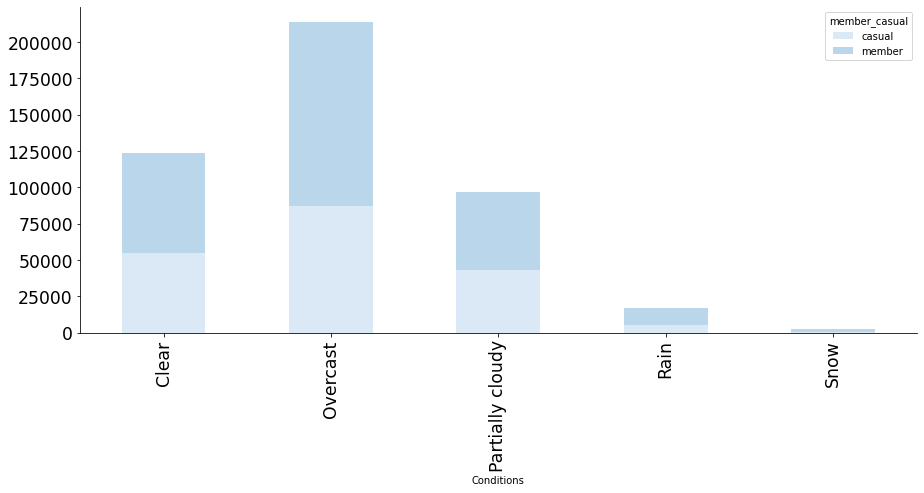

In [ ]:
df.groupby(['Conditions'])['member_casual'].value_counts().unstack().plot(kind='bar',stacked = True);

In [ ]:
df.groupby(['Conditions2'])['member_casual'].value_counts(normalize=True)

Conditions2       member_casual
Clear             member           0.557625
                  casual           0.442375
Overcast          member           0.592765
                  casual           0.407235
Partially cloudy  member           0.555329
                  casual           0.444671
Rain_snow         member           0.702514
                  casual           0.297486
Name: member_casual, dtype: float64

→ Only 4% of rides when it is raining or snowing, hence we investigate the relationship between members and casual bikers when it rains.

In [ ]:
print(df.groupby(['Conditions'])['member_casual'].value_counts(normalize=True)['Clear'])
print(df.groupby(['Conditions'])['member_casual'].value_counts(normalize=True)['Overcast'])
print(df.groupby(['Conditions'])['member_casual'].value_counts(normalize=True)['Partially cloudy'])
print(df.groupby(['Conditions'])['member_casual'].value_counts(normalize=True)['Rain'])
print(df.groupby(['Conditions'])['member_casual'].value_counts(normalize=True)['Snow'])

member_casual
member    0.555761
casual    0.444239
Name: member_casual, dtype: float64
member_casual
member    0.590935
casual    0.409065
Name: member_casual, dtype: float64
member_casual
member    0.553189
casual    0.446811
Name: member_casual, dtype: float64
member_casual
member    0.693035
casual    0.306965
Name: member_casual, dtype: float64
member_casual
member    0.759696
casual    0.240304
Name: member_casual, dtype: float64


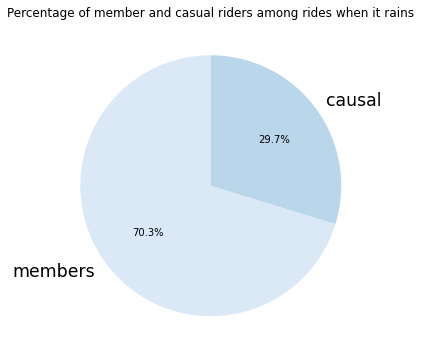

In [ ]:
import matplotlib.pyplot as plt
x = df.groupby(['Conditions2'])['member_casual'].value_counts(normalize=True)['Rain_snow']
fig1, ax1 = plt.subplots()
labels = ['members', 'causal']
ax1.pie(x,labels= labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Percentage of member and casual riders among rides when it rains');

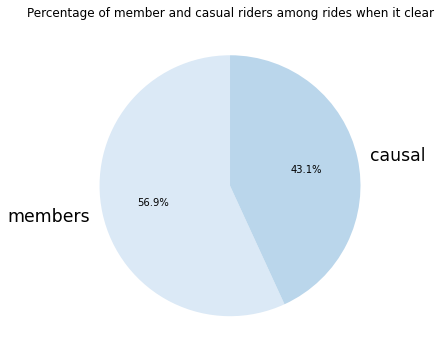

In [ ]:
import matplotlib.pyplot as plt
x = df.groupby(['Conditions'])['member_casual'].value_counts(normalize=True)['Clear'] + \
    df.groupby(['Conditions'])['member_casual'].value_counts(normalize=True)['Overcast'] + \
    df.groupby(['Conditions'])['member_casual'].value_counts(normalize=True)['Partially cloudy']
fig1, ax1 = plt.subplots()
labels = ['members', 'causal']
ax1.pie(x,labels= labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Percentage of member and casual riders among rides when it clear');

#Number of rides with wind

In [ ]:
df['Wind Speed'].describe()

count    453741.000000
mean         16.193497
std           9.005658
min           0.000000
25%           9.700000
50%          14.600000
75%          21.400000
max          58.500000
Name: Wind Speed, dtype: float64

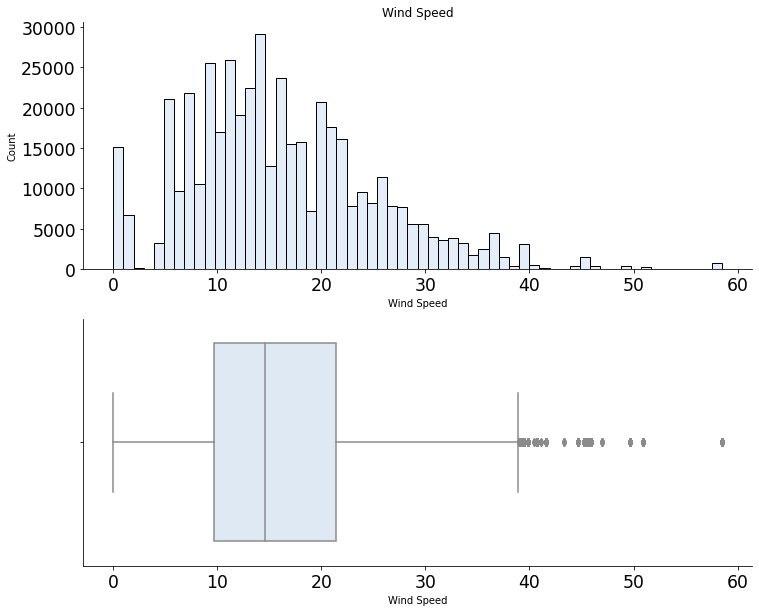

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))

plt.subplot(2, 1, 1)
sns.histplot(df['Wind Speed'], bins= 60, kde=False)
plt.title('Wind Speed')

plt.subplot(2, 1, 2)
sns.boxplot(x='Wind Speed', data=df);

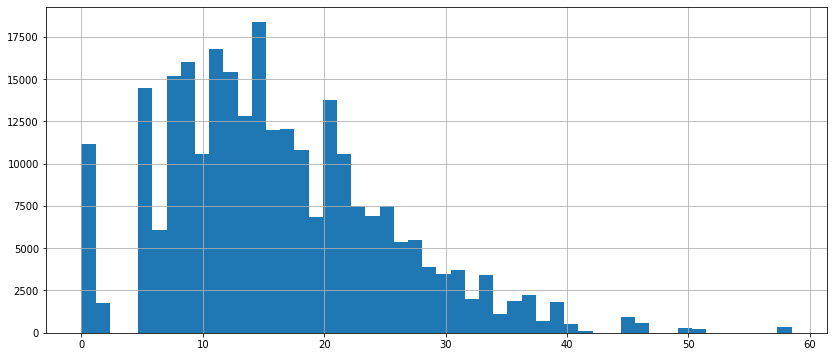

In [ ]:
df.loc[df['member_casual']== 'member','Wind Speed'].hist(bins=50, figsize=[14,6]);

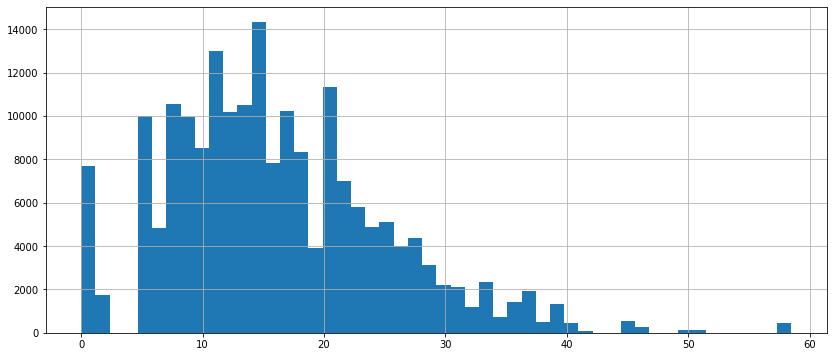

In [ ]:
df.loc[df['member_casual']== 'casual','Wind Speed'].hist(bins=50, figsize=[14,6]);

In [ ]:
df.groupby('member_casual')['Wind Speed'].describe()

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,193038.0,16.191618,8.966987,0.0,9.9,14.6,21.2,58.5
member,264466.0,16.193417,9.031210,0.0,9.4,14.6,21.6,58.5


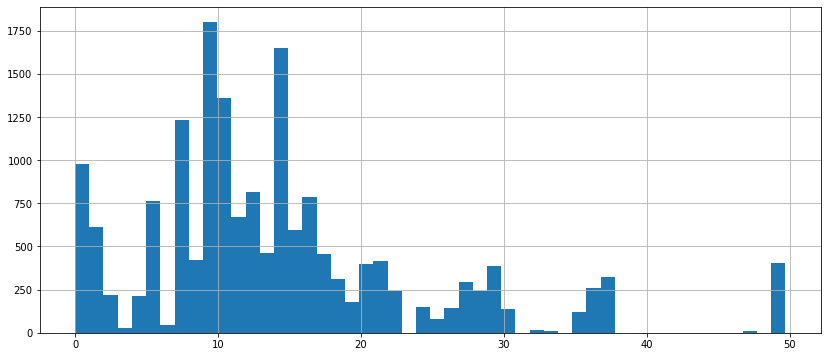

In [ ]:
df[df['Conditions'] == 'Rain']['Wind Speed'].hist(bins=50, figsize=[14,6]);

In [ ]:
df.loc[df['member_casual']== 'member' ,'Wind Speed'].describe()

count    263146.000000
mean         16.195108
std           9.032193
min           0.000000
25%           9.400000
50%          14.600000
75%          21.600000
max          58.500000
Name: Wind Speed, dtype: float64

In [ ]:
df.loc[df['Conditions'] == 'Rain','Wind Speed'].describe()

count    17121.000000
mean        14.336003
std         10.164512
min          0.000000
25%          8.000000
50%         12.400000
75%         17.800000
max         49.700000
Name: Wind Speed, dtype: float64

In [ ]:
df[df['Conditions'] == 'Rain'].loc[df['member_casual']== 'member' ,'Wind Speed'].describe()

count    11884.000000
mean        14.163371
std         10.068312
min          0.000000
25%          8.000000
50%         12.300000
75%         17.700000
max         49.700000
Name: Wind Speed, dtype: float64

In [ ]:
df[df['Conditions'] == 'Rain'].loc[df['member_casual']== 'casual' ,'Wind Speed'].describe()

count    5237.000000
mean       14.727745
std        10.369822
min         0.000000
25%         8.100000
50%        12.600000
75%        17.800000
max        49.700000
Name: Wind Speed, dtype: float64

In [ ]:
df_weather['Temperature'].describe()

count    2130.000000
mean        9.405446
std         7.179019
min        -4.000000
25%         3.200000
50%         9.000000
75%        14.600000
max        29.900000
Name: Temperature, dtype: float64

In [ ]:
df['Temperature'].describe()

count    453741.000000
mean         13.945014
std           6.973009
min          -4.000000
25%           8.900000
50%          14.300000
75%          18.800000
max          29.900000
Name: Temperature, dtype: float64

In [ ]:
df.loc[df['member_casual']== 'casual' ,'Temperature'].describe()

count    190595.000000
mean         14.934693
std           6.584064
min          -4.000000
25%          10.500000
50%          15.600000
75%          19.500000
max          29.900000
Name: Temperature, dtype: float64

In [ ]:
df.loc[df['member_casual']== 'member' ,'Temperature'].describe()

count    263146.000000
mean         13.228196
std           7.156743
min          -4.000000
25%           8.000000
50%          13.700000
75%          18.300000
max          29.900000
Name: Temperature, dtype: float64

In [ ]:
df.loc[df['Conditions2'] == 'Rain_snow','Temperature'].describe()

count    19611.000000
mean         8.837561
std          6.890194
min         -3.500000
25%          2.100000
50%         10.000000
75%         14.300000
max         24.700000
Name: Temperature, dtype: float64

In [ ]:
df[df['Conditions2'] == 'Rain_snow'].loc[df['member_casual']== 'casual' ,'Temperature'].describe()

count    5834.000000
mean       10.035722
std         6.974582
min        -3.500000
25%         3.300000
50%        11.600000
75%        15.000000
max        24.700000
Name: Temperature, dtype: float64

In [ ]:
df[df['Conditions2'] == 'Rain_snow'].loc[df['member_casual']== 'member' ,'Temperature'].describe()

count    13777.000000
mean         8.330188
std          6.790980
min         -3.500000
25%          1.700000
50%          8.700000
75%         13.800000
max         24.700000
Name: Temperature, dtype: float64

GOOD: THE MEAN OF RAIN AMONG CASUAL AND MEMBERS IS STAT. DIFFERENT